# Imports

In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from utils_preprocessing import (cor_heatmap, pie_chart, 
                                 set_plot_properties, bar_chart, 
                                 line_chart, histogram_grid, outlier_check_IQR)


warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", None)

In [2]:
%cd ..
customer_data = pd.read_csv('datasets/customer_info.csv', index_col = 0)
geometry = customer_data[['customer_id', 'latitude', 'longitude']].copy()
customer_data.drop(['latitude', 'longitude'], axis = 1, inplace = True)
%cd Pre-processing

c:\Users\luisb\OneDrive\Documentos\uni\Year 2\Semester 2\Machine learning 2\ML2_project
c:\Users\luisb\OneDrive\Documentos\uni\Year 2\Semester 2\Machine learning 2\ML2_project\Pre-processing


# Introduction

In this project, we will tackle the task of seggregating and profiling customers of a retail store based on a dataset which includes data on customers' spending habits as well as data regarding information about the customer, such as their birthdate and name.
For clarity, this project has been split into multiple notebooks which work in a chain-like way where data is exported from one notebook to the next. For this reason, in theory, it is better to run all notebooks in the following order: Project_preprocessing(this one) -> Project Geo_Analysis(in the Geo-Analysis folder) -> Project_clustering(in the Modelling folder) -> Project cluster_analysis(in the Modelling folder) -> Project_Association_Rules(in the Association Rules folder). For more practical ease of use all of the datasets that are exported and required in future notebooks have been exported to the datasets folder allowing for the option to run one notebook without having to run all of the previous ones.

# Exploratory Analysis

The first step in any problem is to get a good understanding of the data we're working with, the Exploratory Analysis section of this notebook aims at obtaining the most information about our data to better judge what techniques will be required regarding the possibility of missing values and outliers as well as what transformations will be made to the data to improve its usability.

We're firstly going to look at the first 10 rows of our dataset and some general information about it, such as datatypes, possible missing values and outliers.

In [3]:
customer_data.head(10)

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number
0,39634,David Frink,male,05/15/1964 10:34 PM,1.00,1.00,1.00,2.00,18306.00,7106.00,17.00,484.00,604.00,943.00,2226.00,4056.00,2174.00,3946.00,2514.00,32.00,0.07,2010.00,NaN
1,43460,Belinda Terry,female,03/26/1988 11:06 PM,1.00,0.00,1.00,2.00,5015.00,1334.00,8.00,344.00,374.00,1217.00,1068.00,1925.00,2115.00,1028.00,1987.00,2566.00,0.21,2014.00,NaN
2,23937,Evelyn Calico,female,04/13/1969 06:07 PM,0.00,1.00,1.00,3.00,3097.00,4073.00,10.00,301.00,852.00,1731.00,446.00,2347.00,1306.00,1504.00,2018.00,1282.00,0.14,2009.00,951127.00
3,2431,Ora Boggess,female,06/15/1941 03:26 AM,0.00,0.00,0.00,1.00,10825.00,207.00,17.00,153.00,252.00,60.00,285.00,151.00,53.00,0.00,4135.00,70.00,0.22,2007.00,958680.00
4,10090,Lonnie Hopson,male,12/18/2001 03:03 AM,0.00,0.00,0.00,1.00,697.00,570.00,NaN,8.00,33.00,2833.00,54.00,172.00,587.00,223.00,64.00,4.00,0.18,2024.00,977059.00
5,24058,Maria Hunt,female,02/21/1959 09:16 PM,1.00,1.00,0.00,2.00,13419.00,12029.00,18.00,NaN,745.00,1323.00,1459.00,4448.00,1405.00,4334.00,2893.00,110.00,0.03,2005.00,971169.00
6,26709,Renee Kraft,female,03/18/1991 10:45 AM,0.00,1.00,1.00,6.00,2064.00,105.00,13.00,255.00,217.00,257.00,348.00,700.00,536.00,495.00,679.00,350.00,0.47,2014.00,966716.00
7,47768,Alison Brown,female,11/28/1971 01:01 AM,5.00,1.00,1.00,1.00,4951.00,3426.00,17.00,538.00,536.00,288.00,1417.00,640.00,168.00,1147.00,945.00,467.00,0.20,2004.00,NaN
8,29757,Lashonda Proctor,female,10/29/1994 12:37 AM,2.00,1.00,2.00,2.00,6804.00,3240.00,9.00,555.00,581.00,396.00,1513.00,2161.00,701.00,601.00,197.00,369.00,0.09,2017.00,963070.00
9,33207,Cora Fanning,female,05/08/1947 11:28 AM,0.00,0.00,1.00,1.00,15848.00,80.00,15.00,205.00,417.00,15.00,203.00,219.00,99.00,0.00,7964.00,43.00,0.43,2009.00,NaN


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 0 to 43630
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              43631 non-null  int64  
 1   customer_name                            43631 non-null  object 
 2   customer_gender                          43631 non-null  object 
 3   customer_birthdate                       43631 non-null  object 
 4   kids_home                                43107 non-null  float64
 5   teens_home                               42610 non-null  float64
 6   number_complaints                        42977 non-null  float64
 7   distinct_stores_visited                  42322 non-null  float64
 8   lifetime_spend_groceries                 43631 non-null  float64
 9   lifetime_spend_electronics               43631 non-null  float64
 10  typical_hour                             41886 non-

In [5]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,43631.00,24993.12,14426.31,1.00,12521.50,24988.00,37484.50,50000.00
kids_home,43107.00,1.08,1.24,0.00,0.00,1.00,1.00,9.00
teens_home,42610.00,0.85,0.84,0.00,0.00,1.00,1.00,6.00
number_complaints,42977.00,0.71,0.62,0.00,0.00,1.00,1.00,9.00
distinct_stores_visited,42322.00,1.67,1.03,1.00,1.00,1.00,2.00,8.00
lifetime_spend_groceries,43631.00,5600.03,4602.65,0.00,2184.50,4071.00,6605.50,26552.00
lifetime_spend_electronics,43631.00,2000.06,3004.92,0.00,218.00,574.00,2565.50,21273.00
typical_hour,41886.00,13.52,4.56,6.00,10.00,13.00,17.00,24.00
lifetime_spend_vegetables,42758.00,456.89,312.83,0.00,227.00,387.00,584.00,2112.00
lifetime_spend_nonalcohol_drinks,43631.00,443.64,210.31,0.00,297.00,419.00,560.00,2224.00


In [6]:
customer_data.describe(include='O').T

,count,unique,top,freq
customer_name,43631,42351,James Brown,10
customer_gender,43631,2,female,21910
customer_birthdate,43631,43594,08/13/1962 08:48 PM,2


From the above analysis, we can conclude that there are missing values in our data, from the .info() analaysis, as well as outliers, from the .describe() analysis, looking at the quartiles, minimum and maximum values. From the .describe() we can also conclude that a missing value in the number_complaints variable doesn't mean that a customer has no registered complaints, but instead means that the data on that for that customer is just missing, we can conclude this because the minimum number of complints is 0. We can also verify that the only variable with problematic values is percentage_of_products_bought_promotion because it has negative values and values higher than 1. Now, to get an even better idea of what our variables and their distributions look like we're going to visualize them.

In [7]:
vars_to_plot_hist = list(customer_data.select_dtypes(include = np.number).columns)
vars_to_plot_hist.remove('loyalty_card_number')
vars_to_plot_hist.remove('customer_id')

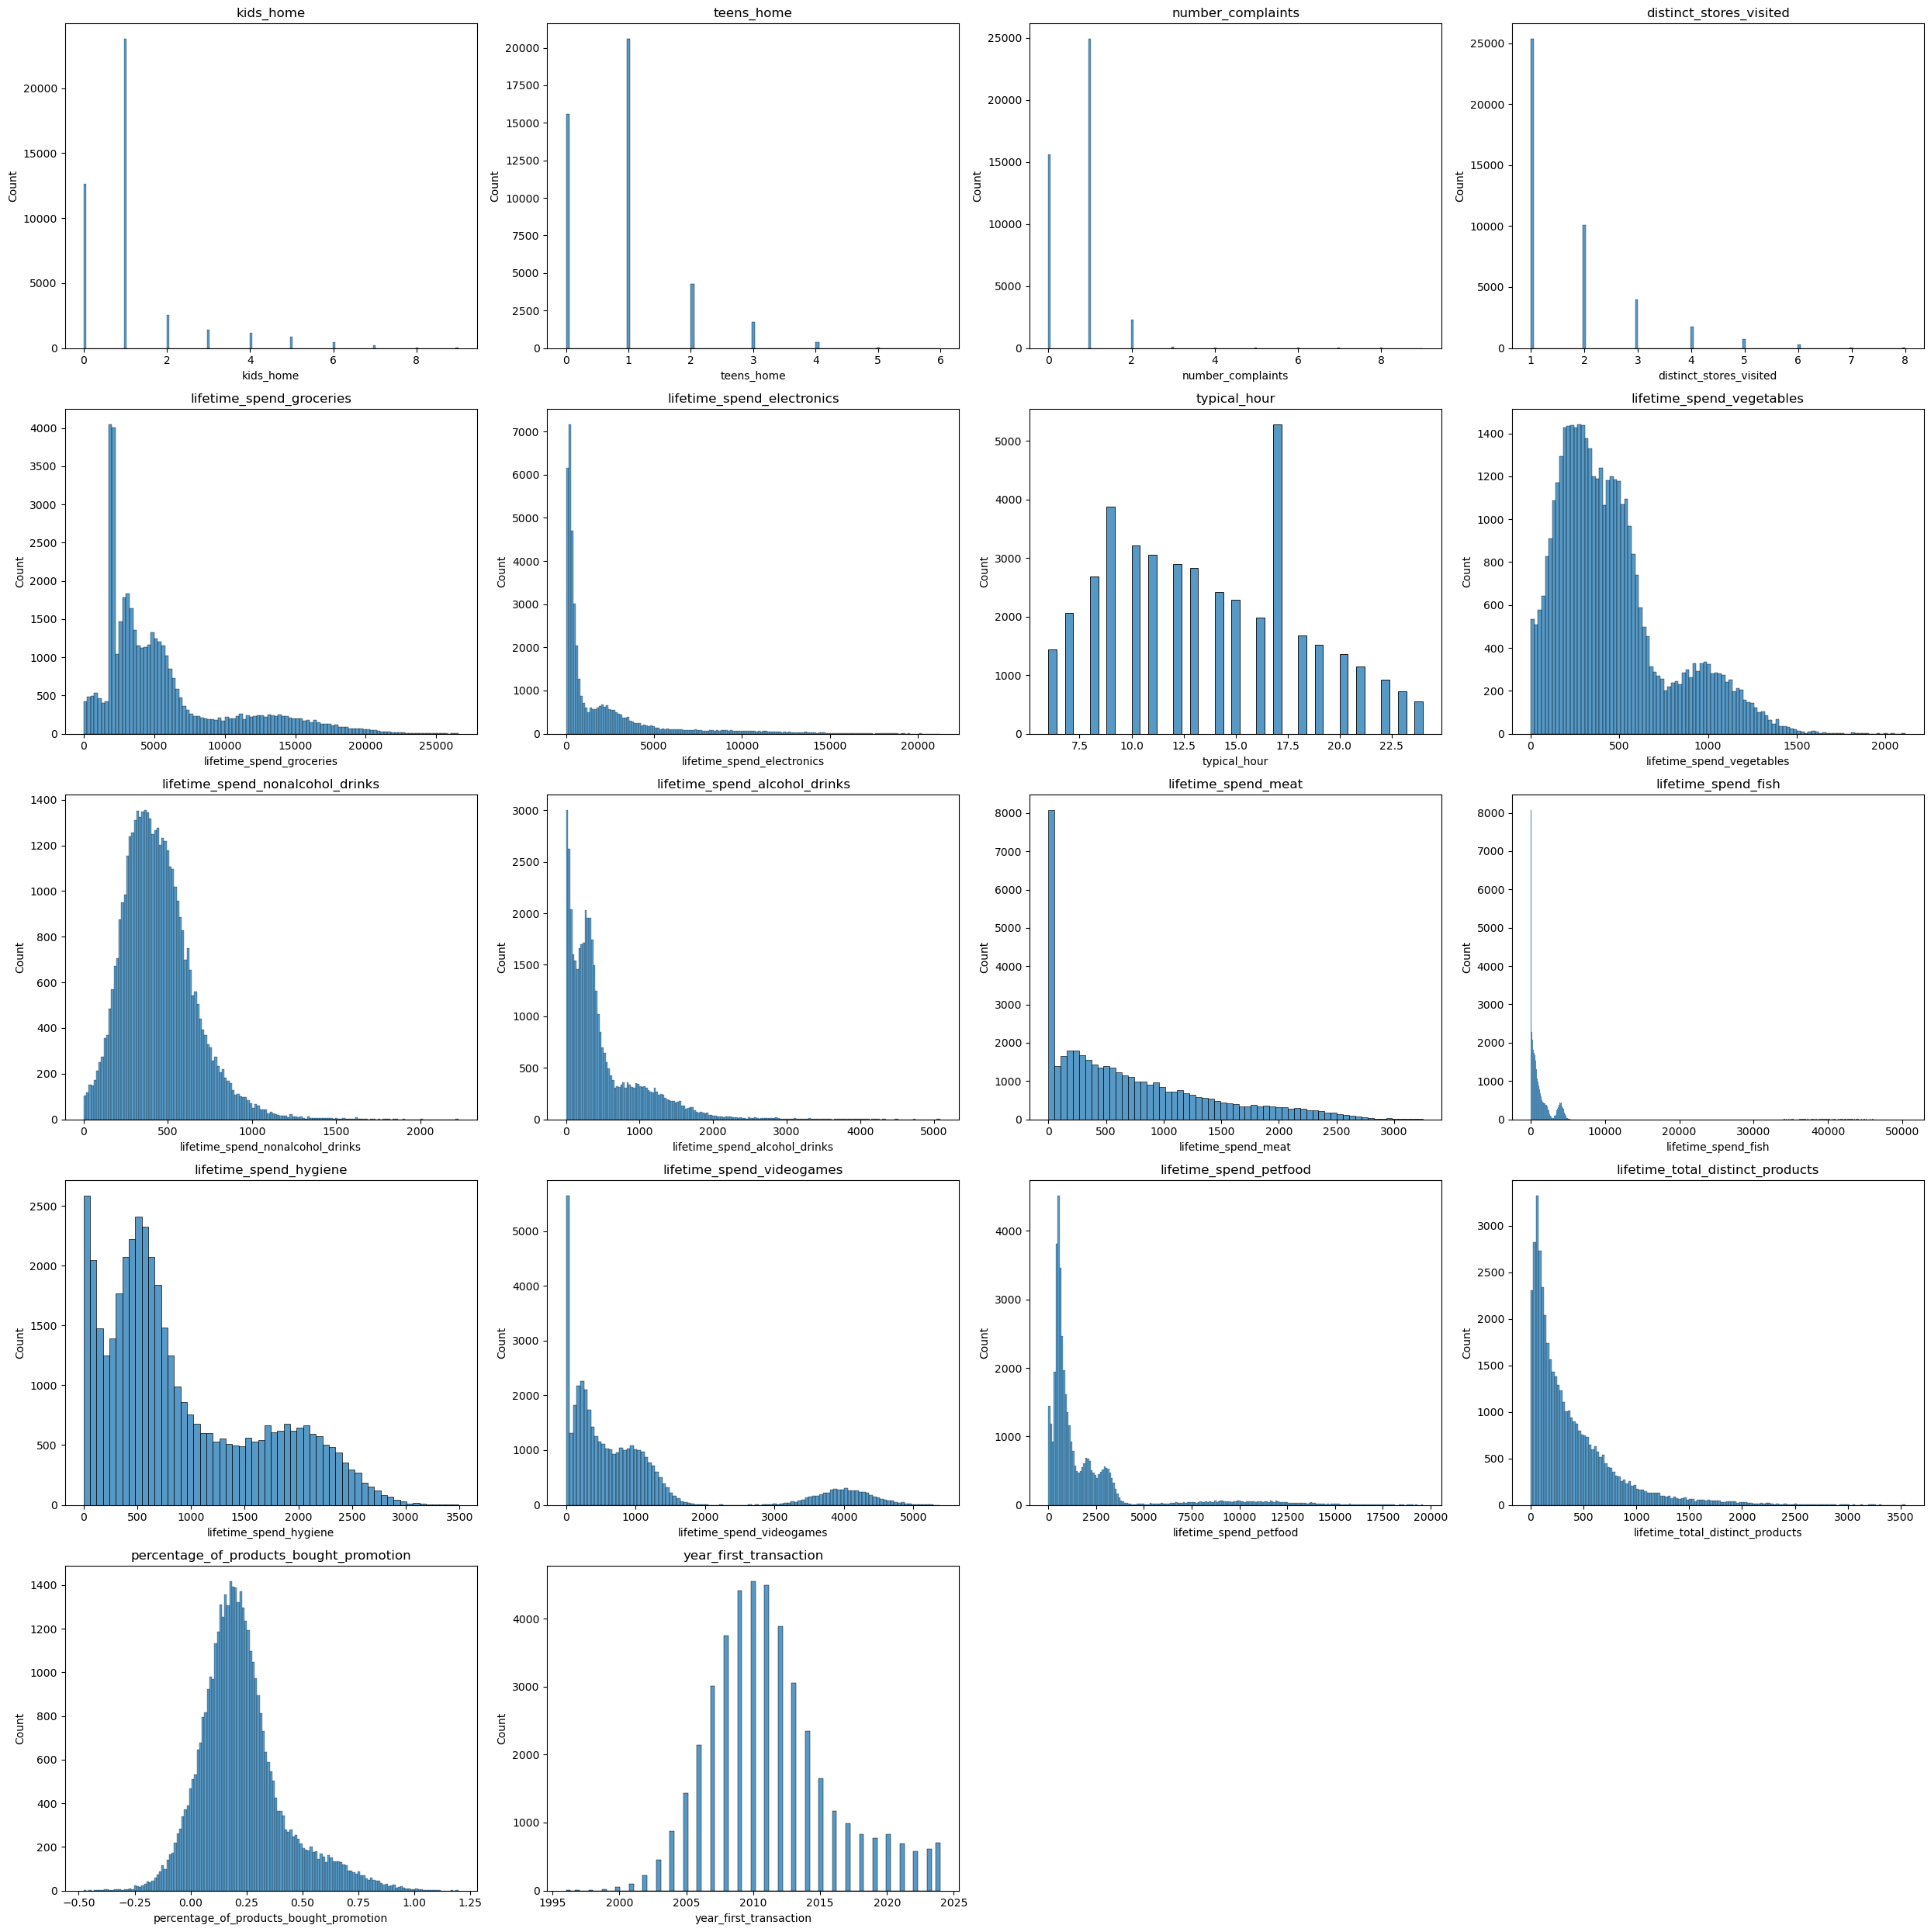

In [8]:
histogram_grid(data=customer_data, variables=vars_to_plot_hist)

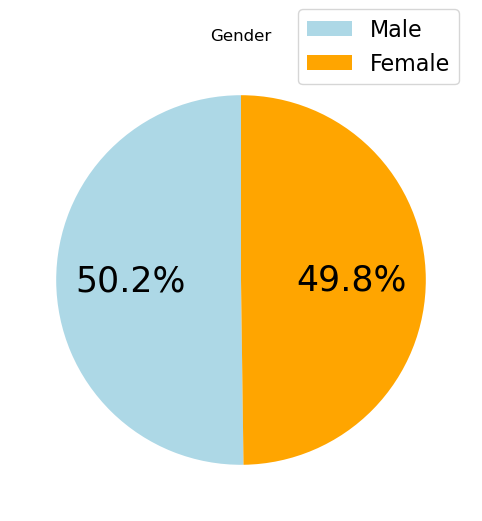

In [9]:
pie_chart(customer_data, variable='customer_gender', colors=['lightblue', 'orange'], legend=['Male', 'Female'], title_= "Gender")

From the plots above we can conclude that our dataset has a nearly identical distribution of male female customers. We can also confirm that there outliers in the data, specially in the lifetime_spend variables. Further analysis on some other variables will be performed later ona they require some transformations to yield relevant information

## Duplicate evaluation

Before proceeding with any further analysis, it's crucial to ensure that there are no duplicated individuals in our customer data

In [10]:
customer_data[customer_data[['customer_id']].duplicated()]

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number


In [11]:
customer_data[customer_data[['customer_name', 'customer_birthdate']].duplicated()] # ALl individuals are unique

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number


We can conclude that all of the individuals in our data are unique and we can use their customer_id as index for our data going forward.

In [12]:
customer_data.set_index('customer_id', inplace = True)

## Feature transformations

In this section, we will perform transformations to our data with the aim of obtaining more valuable and interpretable insight from our data.

<b>Note:</b> There will be a transformation to obtain dummy variables for the the customers' edcation. This will be performed at the end as these dummies are purely for analysis and won't be used for modelling and as such it makes sense not to include them in the imputation of missing values

Firstly, we're gonna replace the birthdate of customers by their age as this is a much easier metric to work with as well as more interpretable in results.


In [13]:
# Calculate Age of Customer
customer_data['customer_birthdate'] = pd.to_datetime(customer_data['customer_birthdate'])
customer_data['Age'] = (
    dt.now().year-customer_data['customer_birthdate'].dt.year
)

Then, we're gonna transform our gender variable into a binary variable where 1's are males and 0's are females, again, mostly, for ease of use.

In [14]:
customer_data['male'] = customer_data['customer_gender'].map({'male' : 1, 'female' : 0})

The next transformation we will perform is regarding the loyalty card number, we believe that the actual number isn't very useful information and we would rather have only the information on whether a customer has a loyalty card or not.

In [15]:
customer_data['loyalty_card'] = customer_data['loyalty_card_number'].notnull() + 0

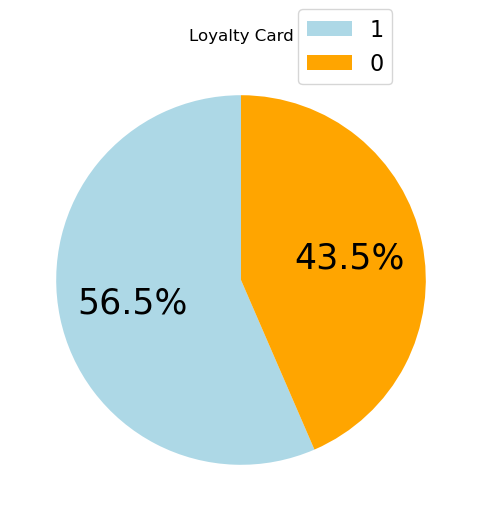

In [16]:
pie_chart(customer_data, variable='loyalty_card', colors=['lightblue', 'orange'], legend=['1', '0'], title_= "Loyalty Card")

From this transformation, we can see that 56.5% have a loyalty card.

The following transformation aims at giving us more relevant information on a customers spending habits, instead of using the actual value spent on a given category we will use the percentage of the total spent that was spent on that category, we will also store the overall total spent for each customer. We believe these changes will greatly help us in our task of grouping customers later on in this project.  

In [17]:
# Extract columns that start with 'spend'
spends = customer_data.columns[customer_data.columns.str.startswith('lifetime_spend')]
# Calculate the total spend by summing the 'spend' columns across rows
customer_data['total_spend'] = customer_data.loc[:, spends].sum(axis = 1)
customer_data.rename(columns = {column: 'pct' + column[8:] for column in spends}, inplace = True)
# Calculate the percentage spend for each 'spend' column
for col in customer_data.columns[customer_data.columns.str.startswith('pct')]:
    # Calculate the percentage spend by dividing the 'spend' column by the total spend
    customer_data[col] = (customer_data[col] / customer_data['total_spend']) * 100

As the year of a customer's first transaction is often not very interpretable and useful for the purpose of this project we will replace it by the tenure of customer by simply subtracting the current year to the year of the first registered transaction.

In [18]:
customer_data['customer_tenure'] = 2024 - customer_data['year_first_transaction']

In [19]:
# Simply dropping the variables that have been replaced
customer_data.drop(['customer_gender',	'customer_birthdate', 'loyalty_card_number', 'year_first_transaction'], axis = 1, inplace = True)

The final transformation we will perform at this stage regards the percentage of products bought through promotion variable, as it had values lower than 0 and higher than 1 which are obviously not possible, as such lower values than 0 will be replaced by 0 and higher values than 1 will be replaced by 1. We will also transform the variable into an actual percentage by multiplying by 100 as it is more easily interpretable this way and doesn't negatively impact our data in any way.

In [20]:
customer_data.loc[customer_data['percentage_of_products_bought_promotion'] > 1, 'percentage_of_products_bought_promotion'] = 1
customer_data.loc[customer_data['percentage_of_products_bought_promotion'] < 0, 'percentage_of_products_bought_promotion'] = 0
customer_data['percentage_of_products_bought_promotion'] = customer_data['percentage_of_products_bought_promotion'] * 100

Now, we'll take a look at our dataset after all the transformations have been performed.

In [21]:
customer_data

,customer_name,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure
customer_id,,,,,,,,,,,,,,,,,,,,,,,
39634,David Frink,1.00,1.00,1.00,2.00,43.22,16.78,17.00,1.14,1.43,2.23,5.26,9.58,5.13,9.32,5.93,32.00,7.22,60,1,0,42359.00,14.00
43460,Belinda Terry,1.00,0.00,1.00,2.00,30.57,8.13,8.00,2.10,2.28,7.42,6.51,11.73,12.89,6.27,12.11,2566.00,20.62,36,0,0,16407.00,10.00
23937,Evelyn Calico,0.00,1.00,1.00,3.00,17.52,23.04,10.00,1.70,4.82,9.79,2.52,13.28,7.39,8.51,11.42,1282.00,13.62,55,0,1,17675.00,15.00
2431,Ora Boggess,0.00,0.00,0.00,1.00,67.15,1.28,17.00,0.95,1.56,0.37,1.77,0.94,0.33,0.00,25.65,70.00,21.59,83,0,1,16121.00,17.00
10090,Lonnie Hopson,0.00,0.00,0.00,1.00,13.30,10.88,NaN,0.15,0.63,54.05,1.03,3.28,11.20,4.25,1.22,4.00,18.10,23,1,1,5241.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,Amelia Crawford,1.00,1.00,0.00,1.00,24.10,21.09,17.00,2.27,2.48,2.14,5.26,12.67,5.86,14.70,9.43,14.00,23.33,41,0,0,29835.00,8.00
24856,Silvia Ramos,1.00,1.00,1.00,1.00,28.05,28.67,12.00,1.50,1.39,3.75,6.51,9.72,4.05,9.56,6.80,25.00,6.10,32,0,1,40071.00,10.00
21373,Addie Coronel,0.00,0.00,0.00,1.00,31.98,1.27,12.00,1.53,2.22,0.23,1.75,0.75,0.94,0.00,59.34,44.00,9.77,30,0,0,18946.00,7.00


## Outliers


In this section, we will re-evaluate the outliers in our data and decide what to do with them.

In [22]:
outlier_vars = list(customer_data.select_dtypes(include = np.number).columns)
outlier_vars.remove('male')
outlier_vars.remove('loyalty_card')
outlier_vars

['kids_home',
 'teens_home',
 'number_complaints',
 'distinct_stores_visited',
 'pct_spend_groceries',
 'pct_spend_electronics',
 'typical_hour',
 'pct_spend_vegetables',
 'pct_spend_nonalcohol_drinks',
 'pct_spend_alcohol_drinks',
 'pct_spend_meat',
 'pct_spend_fish',
 'pct_spend_hygiene',
 'pct_spend_videogames',
 'pct_spend_petfood',
 'lifetime_total_distinct_products',
 'percentage_of_products_bought_promotion',
 'Age',
 'total_spend',
 'customer_tenure']

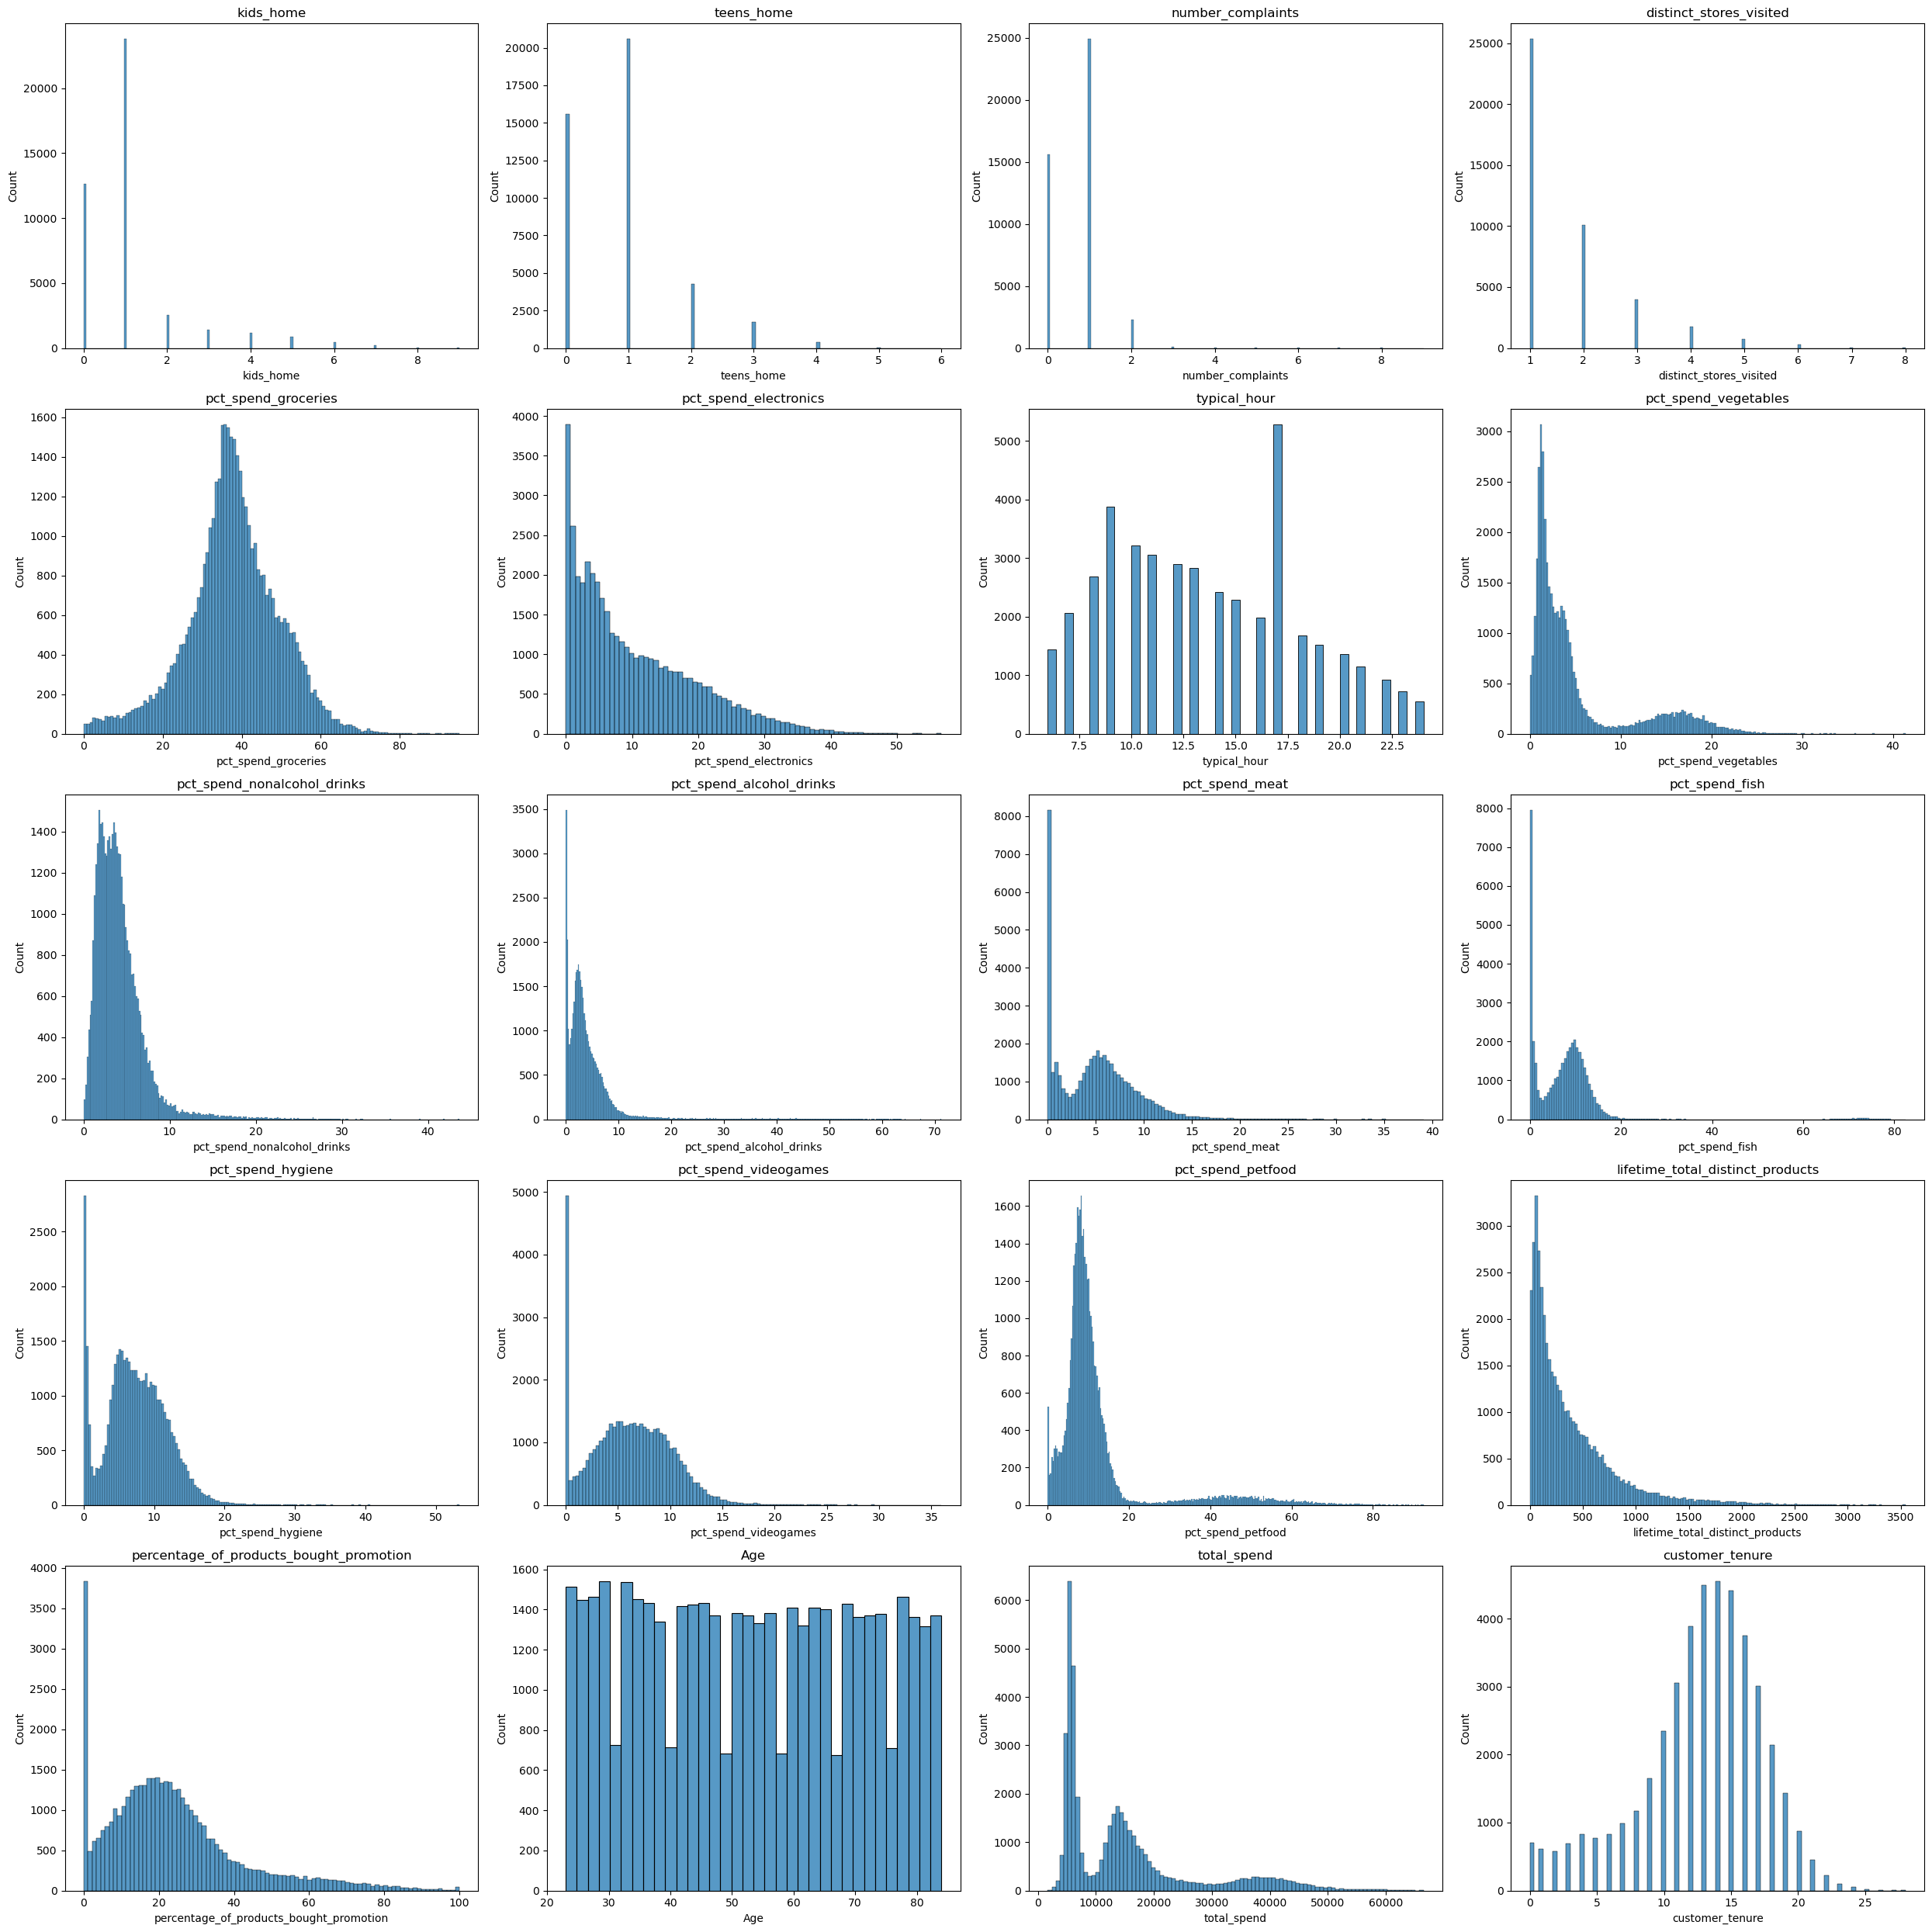

In [23]:
histogram_grid(data=customer_data, variables=outlier_vars)

In [24]:
outlier_check_IQR(customer_data, outlier_vars)

Excluding all normal outliers, we are left with
          38.31% of our dataset


In [25]:
outlier_check_IQR(customer_data, outlier_vars, outlier_type = 'extreme')

Excluding all extreme outliers, we are left with
          60.37% of our dataset


We can see from the information above that our transformation have worked in reducing the extremity of some outliers. However, it is clear that there are still outliers, but removing them using a method such as the Boxplot method (IQR method) would require a very large loss of information. In most cases, it is clear that these outliers are actually groups and not just single points, which means that clustering with these outliers may not be as problematic. For these reasons, we will not exclude any outliers.

## Missing Values

In this section, we will identify and treat any existing missing values in our data.

In [26]:
customer_data.isna().sum()

customer_name                                 0
kids_home                                   524
teens_home                                 1021
number_complaints                           654
distinct_stores_visited                    1309
pct_spend_groceries                           0
pct_spend_electronics                         0
typical_hour                               1745
pct_spend_vegetables                        873
pct_spend_nonalcohol_drinks                   0
pct_spend_alcohol_drinks                      0
pct_spend_meat                                0
pct_spend_fish                             1309
pct_spend_hygiene                             0
pct_spend_videogames                          0
pct_spend_petfood                             0
lifetime_total_distinct_products              0
percentage_of_products_bought_promotion       0
Age                                           0
male                                          0
loyalty_card                            

We can see that we have some missing values in 7 of our variables. To impute them we will use KNNImputer with 5 neighbors (default value) with a scaled version of our dataset scaled using Robsut Scaler as we haven't removed any outliers from our data.

In [27]:
scaler = RobustScaler()
customer_data_n = customer_data.select_dtypes(include = np.number)
customer_data_n_scaled = scaler.fit_transform(customer_data_n)
imputer = KNNImputer()
customer_data_n_scaled_imp = imputer.fit_transform(customer_data_n_scaled)

Now, we're going to obtain a dataframe of imputed non scaled data using inverse_transform to obtain the imputed data in its original scale with the goal of removing float values in 4 of our variables('kids_home', 'teens_home', 'number_complaints', 'distinct_stores_visited'), this will be done simply by rounding those values to the nearest integer number.

In [28]:
customer_data_n_imp_DF = pd.DataFrame(scaler.inverse_transform(customer_data_n_scaled_imp), index = customer_data_n.index, columns = customer_data_n.columns)
customer_data_n_imp_DF

,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure
customer_id,,,,,,,,,,,,,,,,,,,,,,
39634,1.00,1.00,1.00,2.00,43.22,16.78,17.00,1.14,1.43,2.23,5.26,9.58,5.13,9.32,5.93,32.00,7.22,60.00,1.00,0.00,42359.00,14.00
43460,1.00,0.00,1.00,2.00,30.57,8.13,8.00,2.10,2.28,7.42,6.51,11.73,12.89,6.27,12.11,2566.00,20.62,36.00,0.00,0.00,16407.00,10.00
23937,0.00,1.00,1.00,3.00,17.52,23.04,10.00,1.70,4.82,9.79,2.52,13.28,7.39,8.51,11.42,1282.00,13.62,55.00,0.00,1.00,17675.00,15.00
2431,0.00,0.00,0.00,1.00,67.15,1.28,17.00,0.95,1.56,0.37,1.77,0.94,0.33,0.00,25.65,70.00,21.59,83.00,0.00,1.00,16121.00,17.00
10090,0.00,0.00,0.00,1.00,13.30,10.88,17.20,0.15,0.63,54.05,1.03,3.28,11.20,4.25,1.22,4.00,18.10,23.00,1.00,1.00,5241.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,1.00,1.00,0.00,1.00,24.10,21.09,17.00,2.27,2.48,2.14,5.26,12.67,5.86,14.70,9.43,14.00,23.33,41.00,0.00,0.00,29835.00,8.00
24856,1.00,1.00,1.00,1.00,28.05,28.67,12.00,1.50,1.39,3.75,6.51,9.72,4.05,9.56,6.80,25.00,6.10,32.00,0.00,1.00,40071.00,10.00
21373,0.00,0.00,0.00,1.00,31.98,1.27,12.00,1.53,2.22,0.23,1.75,0.75,0.94,0.00,59.34,44.00,9.77,30.00,0.00,0.00,18946.00,7.00


In [29]:
vars_to_round = ['kids_home', 'teens_home', 'number_complaints', 'distinct_stores_visited']
for var in vars_to_round:
    customer_data_n_imp_DF[var] = customer_data_n_imp_DF[var].apply(lambda row: round(row))  

We will once scale back our data without refitting our scaler to obtain a scaled and imputed DataFrame of our data, which we can see no longer has any missing values.

In [30]:
customer_data_n_scaled_imp_DF = pd.DataFrame(scaler.transform(customer_data_n_imp_DF), index = customer_data_n_imp_DF.index, columns = customer_data_n_imp_DF.columns)
customer_data_n_scaled_imp_DF.isna().sum()

kids_home                                  0
teens_home                                 0
number_complaints                          0
distinct_stores_visited                    0
pct_spend_groceries                        0
pct_spend_electronics                      0
typical_hour                               0
pct_spend_vegetables                       0
pct_spend_nonalcohol_drinks                0
pct_spend_alcohol_drinks                   0
pct_spend_meat                             0
pct_spend_fish                             0
pct_spend_hygiene                          0
pct_spend_videogames                       0
pct_spend_petfood                          0
lifetime_total_distinct_products           0
percentage_of_products_bought_promotion    0
Age                                        0
male                                       0
loyalty_card                               0
total_spend                                0
customer_tenure                            0
dtype: int

In [31]:
customer_data_n_scaled_imp_DF

,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure
customer_id,,,,,,,,,,,,,,,,,,,,,,
39634,0.00,0.00,0.00,1.00,0.42,0.68,0.57,-0.43,-0.72,-0.20,0.06,0.22,-0.35,0.57,-0.56,-0.50,-0.67,0.22,1.00,-1.00,2.44,0.17
43460,0.00,-1.00,0.00,1.00,-0.53,0.02,-0.71,-0.19,-0.44,1.19,0.26,0.45,0.97,0.03,0.61,5.26,0.00,-0.53,0.00,-1.00,0.32,-0.50
23937,-1.00,0.00,0.00,2.00,-1.50,1.16,-0.43,-0.29,0.40,1.83,-0.37,0.61,0.04,0.42,0.48,2.34,-0.35,0.06,0.00,0.00,0.43,0.33
2431,-1.00,-1.00,-1.00,0.00,2.21,-0.50,0.57,-0.48,-0.67,-0.70,-0.49,-0.71,-1.16,-1.08,3.18,-0.41,0.05,0.94,0.00,0.00,0.30,0.67
10090,-1.00,-1.00,-1.00,0.00,-1.82,0.23,0.60,-0.68,-0.98,13.70,-0.61,-0.46,0.68,-0.33,-1.46,-0.56,-0.12,-0.94,1.00,0.00,-0.59,-2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,0.00,0.00,-1.00,0.00,-1.01,1.01,0.57,-0.14,-0.37,-0.22,0.06,0.55,-0.22,1.52,0.10,-0.54,0.14,-0.38,0.00,-1.00,1.42,-0.83
24856,0.00,0.00,0.00,0.00,-0.72,1.59,-0.14,-0.34,-0.73,0.21,0.26,0.23,-0.53,0.61,-0.40,-0.52,-0.72,-0.66,0.00,0.00,2.26,-0.50
21373,-1.00,-1.00,-1.00,0.00,-0.42,-0.50,-0.14,-0.33,-0.46,-0.74,-0.49,-0.73,-1.06,-1.08,9.58,-0.47,-0.54,-0.72,0.00,-1.00,0.53,-1.00


## Checking Correlations

In this section, we will check for highly correlated variables in our data and handle them if needed.

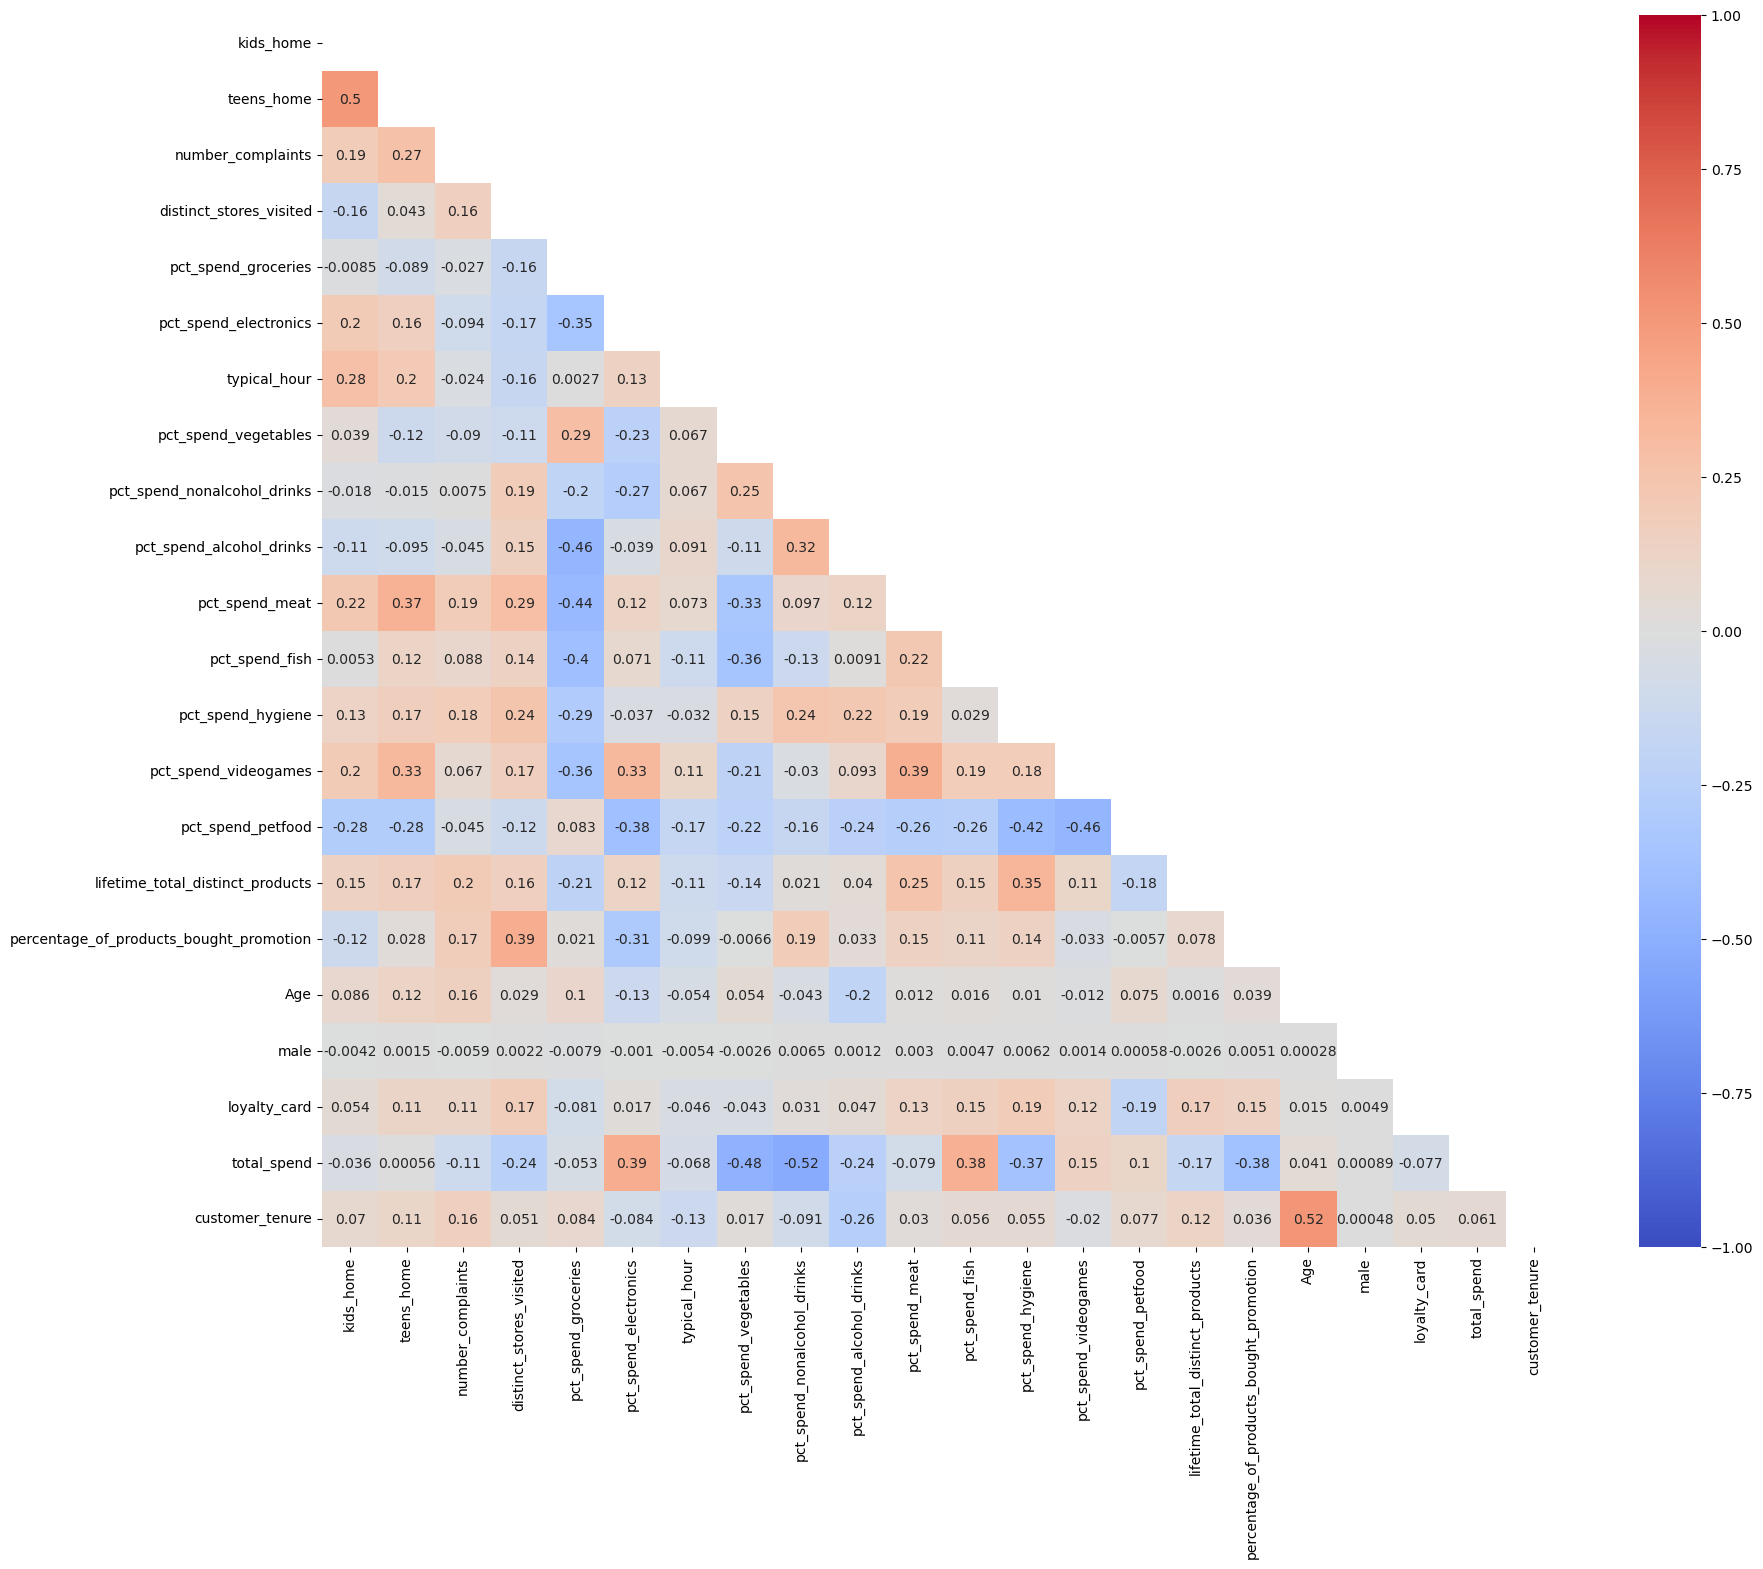

In [32]:
cor_heatmap(customer_data_n_imp_DF.corr(numeric_only = True))

From the heatmap above we can conclude that in our data there aren't any pairs of highly correlated variables, so we won´t use PCA to reduce dimensionality because it won't give us valuable results.

## Final transformations

In the final section, we will perform the transformation for customer education mentioned previously as well readding the customer name to our imputed but not scaled data. In this section no transformations are performed on our scaled and imputed data, as the customer name and education level won't be used for modelling. Then both datasets(scaled and imputed and imputed not scaled) will be exported. The imputed and scaled data will be used for cluster modelling and the imputed not scaled data will be used for cluster analysis and comparison.

In [33]:
customer_data_n_imp_DF = pd.concat([customer_data_n_imp_DF, customer_data.customer_name], axis = 1)
customer_data_n_imp_DF

,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,customer_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,
39634,1,1,1,2,43.22,16.78,17.00,1.14,1.43,2.23,5.26,9.58,5.13,9.32,5.93,32.00,7.22,60.00,1.00,0.00,42359.00,14.00,David Frink
43460,1,0,1,2,30.57,8.13,8.00,2.10,2.28,7.42,6.51,11.73,12.89,6.27,12.11,2566.00,20.62,36.00,0.00,0.00,16407.00,10.00,Belinda Terry
23937,0,1,1,3,17.52,23.04,10.00,1.70,4.82,9.79,2.52,13.28,7.39,8.51,11.42,1282.00,13.62,55.00,0.00,1.00,17675.00,15.00,Evelyn Calico
2431,0,0,0,1,67.15,1.28,17.00,0.95,1.56,0.37,1.77,0.94,0.33,0.00,25.65,70.00,21.59,83.00,0.00,1.00,16121.00,17.00,Ora Boggess
10090,0,0,0,1,13.30,10.88,17.20,0.15,0.63,54.05,1.03,3.28,11.20,4.25,1.22,4.00,18.10,23.00,1.00,1.00,5241.00,0.00,Lonnie Hopson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,1,1,0,1,24.10,21.09,17.00,2.27,2.48,2.14,5.26,12.67,5.86,14.70,9.43,14.00,23.33,41.00,0.00,0.00,29835.00,8.00,Amelia Crawford
24856,1,1,1,1,28.05,28.67,12.00,1.50,1.39,3.75,6.51,9.72,4.05,9.56,6.80,25.00,6.10,32.00,0.00,1.00,40071.00,10.00,Silvia Ramos
21373,0,0,0,1,31.98,1.27,12.00,1.53,2.22,0.23,1.75,0.75,0.94,0.00,59.34,44.00,9.77,30.00,0.00,0.00,18946.00,7.00,Addie Coronel


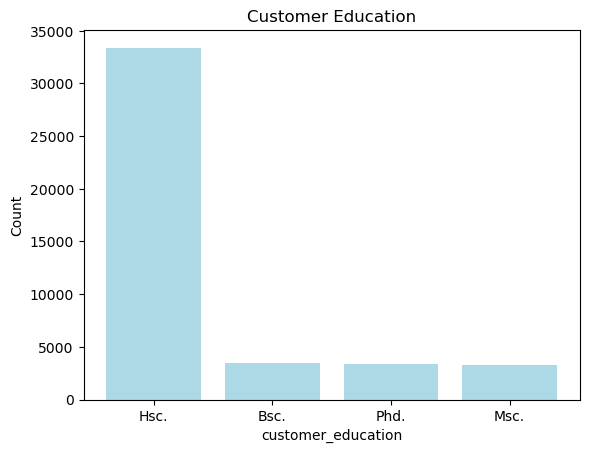

In [34]:
customer_data_n_imp_DF['customer_education'] = customer_data_n_imp_DF.customer_name.apply(lambda x: x[:4] if x[:4] in ['Bsc.', 'Msc.', 'Phd.'] else 'Hsc.')
axes = plt.axes()
bar_chart(ax=axes, data=customer_data_n_imp_DF, variable='customer_education', x_label='customer_education', title_="Customer Education")
customer_data_n_imp_DF = pd.concat([customer_data_n_imp_DF, pd.get_dummies(customer_data_n_imp_DF['customer_education']) + 0], 
                    axis=1)
customer_data_n_imp_DF.drop('customer_education', axis=1, inplace=True)

As we can see from the bar chart the distribution of our education variable has a very high disparity, this further confirms our decision to exclude it from modelling.

In [35]:
%cd ..
customer_data_n_scaled_imp_DF.to_csv('datasets/scaled_preprocessed_data.csv')

c:\Users\luisb\OneDrive\Documentos\uni\Year 2\Semester 2\Machine learning 2\ML2_project


In [36]:
customer_data_n_imp_DF = pd.concat([customer_data_n_imp_DF, geometry.set_index('customer_id')], axis = 1)
customer_data_n_imp_DF.to_csv('datasets/non_scaled_preprocessed_data.csv')